**Predict Diabetes From Medical Records**

Diabetes mellitus (DM), commonly referred to as diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Type 1 diabetes results from the pancreas's failure to produce enough insulin.  Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly.  As of 2015, an estimated 415 million people had diabetes worldwide, with type 2 diabetes making up about 90% of the cases. This represents 8.3% of the adult population.    Source: https://en.wikipedia.org/wiki/Diabetes_mellitus

The [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) can be used to train machine learning models to predict if a given patient has diabetes.  This dataset contains measurements relating to Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.  


*Step 1: Import Python Packages*

In [15]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import graphviz 
from sklearn import model_selection
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

*Step 2: Define Helper Functions*

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def compareABunchOfDifferentModelsAccuracy(a, b, c, d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """    
    print('\nCompare Multiple Classifiers: \n')
    print('K-Fold Cross-Validation Accuracy: \n')
    names = []
    models = []
    resultsAccuracy = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, a,b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage) 
    # Boxplot
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()    
      
def defineModels():
    print('\nLR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('GBC = GradientBoostingClassifier \n\n')

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLPClassifier", "AdaBoost",
         "Naive Bayes", "QDA"]    

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

dict_characters = {0: 'Healthy', 1: 'Diabetes'}

*Step 3: Inspect and Clean Data*

When starting a new data analysis project it is important to inspect, understand, and clean the data.  When inspecting the first ten rows of data one thing that jumps out right away is that there are measurements of zero for both insulin levels and skin thickness.  

In [17]:
dataset = read_csv('../input/diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It would be a serious medical problem if a patient had an insulin level and skin thickness measurement of zero.  As such, we can conclude that this dataset uses the number zero to represent missing or null data.  Here we can see that as many as half of the rows contain columns with missing data.

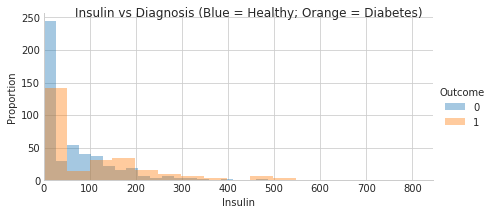

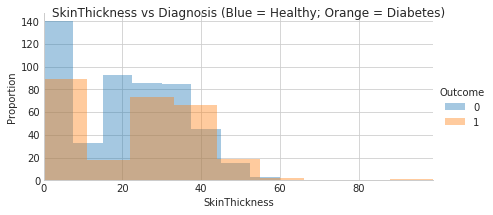

In [18]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(dataset,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(dataset,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

In [19]:
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [20]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(((dataset2[:] == 0).sum())/768*100)

# of Rows, # of Columns:  (768, 8)

Column Name              % Null Values

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


Approximately 50% of the patients did not have their insulin levels measured.  This causes me to be concerned that maybe the doctors only measured insulin levels in unhealthy looking patients -- or maybe they only measured insulin levels after having first made a preliminary diagnosis.  If that were true then this would be a form of [data leakage](https://www.kaggle.com/dansbecker/data-leakage), and it would mean that our model would not generalize well to data collected from doctors who measure insulin levels for every patient.  In order to test this hypothesis I will check whether or not the Insulin and SkinThickness features are correlated with a diagnostic outcome (healthy/diabetic).  What we find is that these features are not highly correlated with any given outcome -- and as such we can rule out our concern of data leakage.


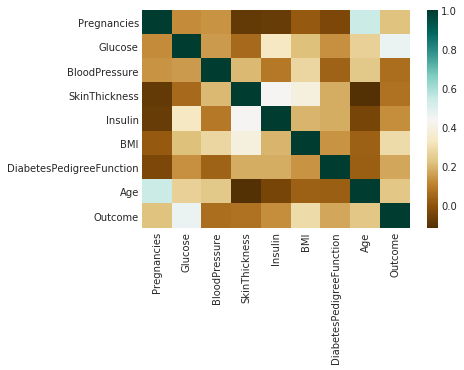

In [21]:
g = sns.heatmap(dataset.corr(),cmap="BrBG",annot=False)

In [22]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The Insulin and SkinThickness measurements are not highly correlated with any given outcome -- and as such we can rule out our concern of data leakage.  The zero values in these categories are still erroneous, however, and therefore should not be included in our model.  It is best to replace these values with some distribution of values near to the median measurement.  Also note that it is best to impute these values *after* the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in order to prevent yet another form of data leakage (i.e. the testing data should not be used when calculating the median value to use during imputation).  The following histogram illustrates that the null values have indeed been replaced with median values.

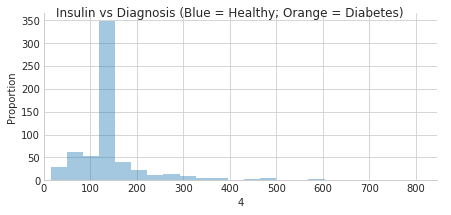

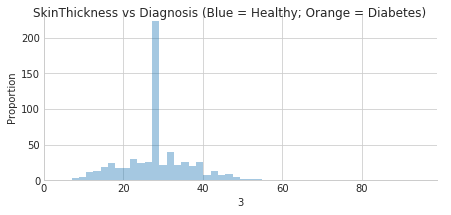

In [23]:
data = read_csv('../input/diabetes.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
imputer = Imputer(missing_values=0,strategy='median')
X_train2 = imputer.fit_transform(X_train)
X_test2 = imputer.transform(X_test)
X_train3 = pd.DataFrame(X_train2)
plotHistogram(X_train3,None,4,'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(X_train3,None,3,'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

In [24]:
labels = {0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age'}
print(labels)
print("\nColumn #, # of Zero Values\n")
print((X_train3[:] == 0).sum())
# data[:] = data[:].replace(0, np.NaN)
# print("\nColumn #, # of Null Values\n")
# print(np.isnan(X_train3).sum())

{0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age'}

Column #, # of Zero Values

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


*Step 4: Evaluate Classification Models*

Because we have replaced all of the erroneous, missing, and null values with median values we are now ready to train and evaluate our models for predicting diabetes.


Compare Multiple Classifiers: 

K-Fold Cross-Validation Accuracy: 

LR: 0.757403 (0.053298)
RF: 0.740772 (0.050469)
KNN: 0.711687 (0.072183)
SVM: 0.653146 (0.061181)
LSVM: 0.612269 (0.127638)
GNB: 0.741142 (0.056920)
DTC: 0.680407 (0.086612)
GBC: 0.755526 (0.074418)


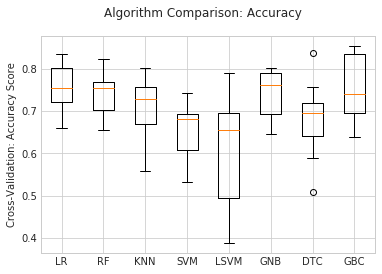


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier 


   Nearest Neighbors | Accuracy: 71.15% (+/- 8.23%)
          Linear SVM | Accuracy: 77.03% (+/- 2.90%)
             RBF SVM | Accuracy: 65.31% (+/- 0.48%)
    Gaussian Process | Accuracy: 67.07% (+/- 13.66%)
       Decision Tree | Accuracy: 68.23% (+/- 9.74%)
       Random Forest | Accuracy: 74.59% (+/- 4.29%)
       MLPClassifier | Accuracy: 70.84% (+/- 8.81%)
            AdaBoost | Accuracy: 73.30% (+/- 6.21%)
         Naive Bayes | Accuracy: 73.79% (+/- 5.07%)
                 QDA | Accuracy: 73.95% (+/- 3.87%)


In [25]:
compareABunchOfDifferentModelsAccuracy(X_train2, y_train, X_test2, y_test)
defineModels()
# iterate over classifiers; adapted from https://www.kaggle.com/hugues/basic-ml-best-of-10-classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train2, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

*Step 5: Examine Decision Tree Model in More Detail*

Next let's explore the decision tree model in more detail.

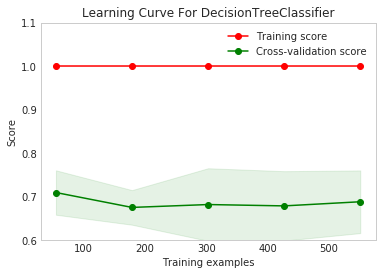

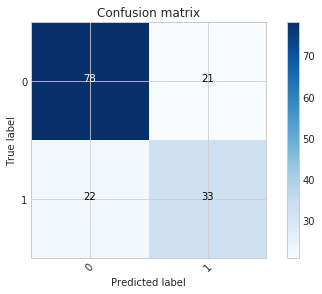

DecisionTreeClassifier - Training set accuracy: 0.675568482285 (0.0734722138917)


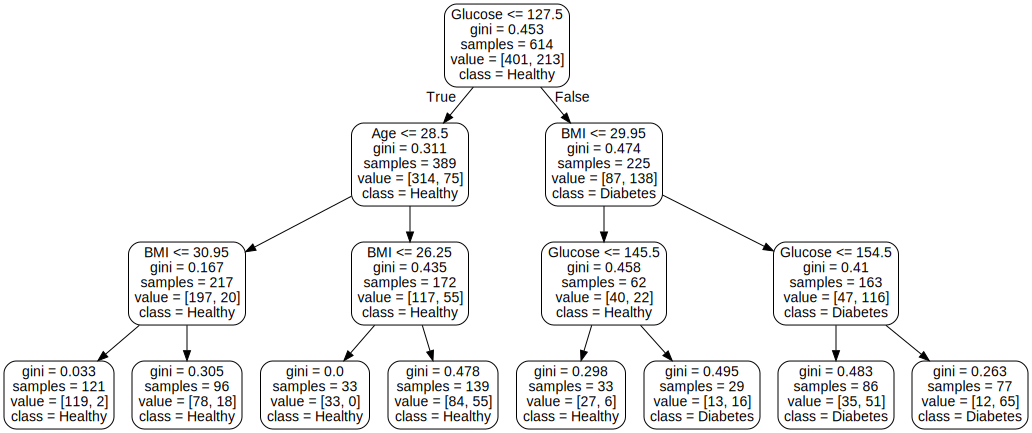

In [26]:
def runDecisionTree(a, b, c, d):
    model = DecisionTreeClassifier()
    accuracy_scorer = make_scorer(accuracy_score)
    model.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, a, b, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    prediction = model.predict(c)
    cnf_matrix = confusion_matrix(d, prediction)
    #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
    plot_learning_curve(model, 'Learning Curve For DecisionTreeClassifier', a, b, (0.60,1.1), 10)
    #learning_curve(model, 'Learning Curve For DecisionTreeClassifier', a, b, (0.60,1.1), 10)
    plt.show()
    plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
    plt.show()
    print('DecisionTreeClassifier - Training set accuracy: %s (%s)' % (mean, stdev))
    return
runDecisionTree(X_train2, y_train, X_test2, y_test)
feature_names1 = X.columns.values
def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Healthy','Diabetes'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train2, y_train)
plot_decision_tree1(clf1,feature_names1)

*Step 6: Evaluate Feature Importances*

Many [kernel authors](https://www.kaggle.com/uciml/pima-indians-diabetes-database/kernels) have neglected to deal with the null values and missing data discussed in this notebook.  This mistake did not actually have much of an impact on the performance of most of their models, however, because, as it happens, the Insulin and SkinThickness measurements are actually very poor predictors and are assigned low feature importances as compared to features such as blood glucose levels and body mass index.

In [27]:
feature_names = X.columns.values
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train2, y_train)
print('Accuracy of DecisionTreeClassifier: {:.2f}'.format(clf1.score(X_test2, y_test)))
columns = X.columns
coefficients = clf1.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('DecisionTreeClassifier - Feature Importance:')
print('\n',fullList,'\n')

feature_names = X.columns.values
clf2 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, y_train)
print('Accuracy of RandomForestClassifier: {:.2f}'.format(clf2.score(X_test2, y_test)))
columns = X.columns
coefficients = clf2.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

clf3 = XGBClassifier()
clf3.fit(X_train2, y_train)
print('Accuracy of XGBClassifier: {:.2f}'.format(clf3.score(X_test2, y_test)))
columns = X.columns
coefficients = clf3.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('XGBClassifier - Feature Importance:')
print('\n',fullList,'\n')


Accuracy of DecisionTreeClassifier: 0.78
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.645256
5                       BMI        0.247421
7                       Age        0.107322
0               Pregnancies        0.000000
2             BloodPressure        0.000000
3             SkinThickness        0.000000
4                   Insulin        0.000000
6  DiabetesPedigreeFunction        0.000000 

Accuracy of RandomForestClassifier: 0.77
RandomForestClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.356653
5                       BMI        0.238124
7                       Age        0.133908
4                   Insulin        0.087891
0               Pregnancies        0.081203
3             SkinThickness        0.054025
6  DiabetesPedigreeFunction        0.033984
2             BloodPressure        0.014212 

Accuracy of XGBClassifier: 0

In the end we were able to predict diabetes from medical records with an accuracy of approximately 82%.  This was done by using tree-based classifiers that focus on important features such as blood glucose levels and body mass index.  In fact, we only lose 5% accuracy by dropping all of the data except for blood glucose levels and body mass index (see below).

In [28]:
data = read_csv('../input/diabetes.csv')
data2 = data.drop(['Pregnancies','BloodPressure','DiabetesPedigreeFunction', 'Age','SkinThickness','Insulin'], axis=1)
X2 = data2.iloc[:, :-1]
y2 = data2.iloc[:, -1]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.2, random_state=1)
imputer = Imputer(missing_values=0,strategy='median')
X_train3 = imputer.fit_transform(X_train3)
X_test3 = imputer.transform(X_test3)
clf4 = XGBClassifier()
clf4.fit(X_train3, y_train3)
print('Accuracy of XGBClassifier in Reduced Feature Space: {:.2f}'.format(clf4.score(X_test3, y_test3)))
columns = X2.columns
coefficients = clf4.feature_importances_.reshape(X2.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('\nXGBClassifier - Feature Importance:')
print('\n',fullList,'\n')

clf3 = XGBClassifier()
clf3.fit(X_train2, y_train)
print('\n\nAccuracy of XGBClassifier in Full Feature Space: {:.2f}'.format(clf3.score(X_test2, y_test)))
columns = X.columns
coefficients = clf3.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('XGBClassifier - Feature Importance:')
print('\n',fullList,'\n')


Accuracy of XGBClassifier in Reduced Feature Space: 0.77

XGBClassifier - Feature Importance:

   Variable  absCoefficient
1      BMI        0.528302
0  Glucose        0.471698 



Accuracy of XGBClassifier in Full Feature Space: 0.82
XGBClassifier - Feature Importance:

                    Variable  absCoefficient
5                       BMI        0.201087
6  DiabetesPedigreeFunction        0.190217
1                   Glucose        0.184783
7                       Age        0.114130
4                   Insulin        0.112319
0               Pregnancies        0.074275
2             BloodPressure        0.067029
3             SkinThickness        0.056159 



*Step 7: Summarize Results*

In this notebook we predicted diabetes from medical records with an accuracy of approximately 82%  -- and we also discussed topics such as missing data, data imputation, and feature importances.